<a href="https://colab.research.google.com/github/Saeed0Baba/PET/blob/main/PET_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 8.1MB/s 
     |████████████████████████████████| 194kB 36.7MB/s 
     |████████████████████████████████| 1.2MB 42.2MB/s 
     |████████████████████████████████| 51kB 9.1MB/s 
     |████████████████████████████████| 61kB 10.5MB/s 
     |████████████████████████████████| 12.8MB 55.6MB/s 
     |████████████████████████████████| 776.8MB 22kB/s 
     |████████████████████████████████| 51kB 8.5MB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.
Mounted at /content/gdrive


In [3]:
from fastbook import *

In [4]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)

In [5]:
Path.BASE_PATH = path

In [6]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = pets.dataloaders(path/"images")

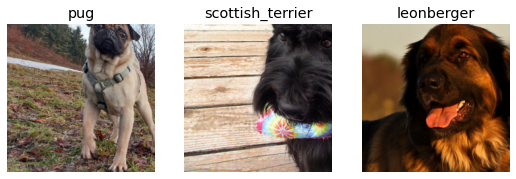

In [7]:
dls.show_batch(nrows=1, ncols=3)

In [8]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.516281,0.327733,0.100812,01:06


epoch,train_loss,valid_loss,error_rate,time
0,0.528410,0.294737,0.090663,01:11
1,0.330728,0.225477,0.073748,01:11
